# Análise Exploratória de Dados - Sentiment Analysis

Este notebook contém uma análise exploratória completa do dataset de sentimentos, incluindo visualizações detalhadas e análises estatísticas.


## 1. Import Required Libraries

Importando todas as bibliotecas necessárias para análise e visualização de dados.

In [2]:
import pandas as pd
import numpy as np
import re
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import nltk

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)


## 2. Load and Inspect Dataset

Carregando e fazendo uma inspeção inicial do dataset.

In [3]:
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, 
                     encoding='latin-1',
                     header=None,
                     delimiter=',',
                     on_bad_lines='skip')
    
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
    
print(f"Dimensões: {df.shape}")

Dimensões: (1600000, 6)


In [4]:
# Primeiras observações
print("PRIMEIRAS 5 LINHAS DO DATASET:")
print("=" * 50)
display(df.head())

print("\nÚLTIMAS 5 LINHAS DO DATASET:")
print("=" * 50)
display(df.tail())

print("\nAMOSTRAS ALEATÓRIAS:")
print("=" * 50)
display(df.sample(3))

PRIMEIRAS 5 LINHAS DO DATASET:


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."



ÚLTIMAS 5 LINHAS DO DATASET:


,target,ids,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...



AMOSTRAS ALEATÓRIAS:


,target,ids,date,flag,user,text
326759,0,2008640002,Tue Jun 02 14:26:03 PDT 2009,NO_QUERY,niccccolle,@leeaannee he has children i m in a state of s...
182100,0,1967057560,Fri May 29 18:53:48 PDT 2009,NO_QUERY,Arti_Sodmg,@TaLisaDuhhh you say fuck them w. a smiley fac...
1184575,4,1982632460,Sun May 31 11:35:46 PDT 2009,NO_QUERY,CaveBabe69,@rainbowglow Glorious...


## 3. Basic Dataset Information

Analisando informações básicas sobre a estrutura do dataset.

In [5]:
print("INFORMAÇÕES GERAIS DO DATASET")
print("=" * 50)
print(f"Número de linhas: {df.shape[0]:,}")
print(f"Número de colunas: {df.shape[1]}")
print(f"Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nINFORMAÇÕES DETALHADAS:")
print("=" * 50)
df.info()

print("\nTIPOS DE DADOS:")
print("=" * 50)
for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")

INFORMAÇÕES GERAIS DO DATASET
Número de linhas: 1,600,000
Número de colunas: 6
Tamanho em memória: 507.21 MB

INFORMAÇÕES DETALHADAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB

TIPOS DE DADOS:
target: int64
ids: int64
date: object
flag: object
user: object
text: object
Tamanho em memória: 507.21 MB

INFORMAÇÕES DETALHADAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non

## 4. Statistical Summary

Gerando estatísticas descritivas para entender melhor os dados.

In [6]:
# Mapear targets para labels mais descritivos
df['label'] = df['target'].map({0: 0, 2: 1, 4: 2})  # 0=Negativo, 1=Neutro, 2=Positivo
label_names = {0: 'Negativo', 1: 'Neutro', 2: 'Positivo'}
df['sentiment'] = df['label'].map(label_names)

print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS:")
print("=" * 60)
display(df.describe())

print("\nESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS:")
print("=" * 60)
display(df.describe(include=['object']))

print("\nDISTRIBUIÇÃO DOS TARGETS:")
print("=" * 60)
target_dist = df['target'].value_counts().sort_index()
for target, count in target_dist.items():
    sentiment = 'Negativo' if target == 0 else ('Neutro' if target == 2 else 'Positivo')
    percentage = (count / len(df)) * 100
    print(f"Target {target} ({sentiment}): {count:,} ({percentage:.2f}%)")

ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS:


,target,ids,label
count,1.600000e+06,1.600000e+06,1600000.0
mean,2.000000e+00,1.998818e+09,1.0
std,2.000001e+00,1.935761e+08,1.0
min,0.000000e+00,1.467810e+09,0.0
25%,0.000000e+00,1.956916e+09,0.0
50%,2.000000e+00,2.002102e+09,1.0
75%,4.000000e+00,2.177059e+09,2.0
max,4.000000e+00,2.329206e+09,2.0



ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS:


,date,flag,user,text,sentiment
count,1600000,1600000,1600000,1600000,1600000
unique,774363,1,659775,1581466,2
top,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry,Negativo
freq,20,1600000,549,210,800000



DISTRIBUIÇÃO DOS TARGETS:
Target 0 (Negativo): 800,000 (50.00%)
Target 4 (Positivo): 800,000 (50.00%)


## 5. Handle Missing Values

Identificando e analisando valores ausentes no dataset.

In [7]:
# Análise de valores ausentes
print("ANÁLISE DE VALORES AUSENTES:")
print("=" * 50)

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Coluna': missing_data.index,
    'Valores Ausentes': missing_data.values,
    'Percentual (%)': missing_percentage.values
})

display(missing_df)

# Visualização de valores ausentes
if missing_data.sum() > 0:
    plt.figure(figsize=(12, 6))
    
    # Gráfico de barras para valores ausentes
    plt.subplot(1, 2, 1)
    missing_data.plot(kind='bar', color='coral')
    plt.title('Valores Ausentes por Coluna')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Heatmap de valores ausentes
    plt.subplot(1, 2, 2)
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Heatmap de Valores Ausentes')
    
    plt.tight_layout()
    plt.show()
else:
    print("Não há valores ausentes no dataset!")

ANÁLISE DE VALORES AUSENTES:


,Coluna,Valores Ausentes,Percentual (%)
0,target,0,0.0
1,ids,0,0.0
2,date,0,0.0
3,flag,0,0.0
4,user,0,0.0
5,text,0,0.0
6,label,0,0.0
7,sentiment,0,0.0


Não há valores ausentes no dataset!


## 6. Data Distribution Analysis

Analisando a distribuição dos dados com diferentes tipos de visualizações.

In [8]:
# Distribuição de sentimentos
print("DISTRIBUIÇÃO DE SENTIMENTOS")
print("=" * 50)

sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = df['sentiment'].value_counts(normalize=True) * 100

for sentiment in sentiment_counts.index:
    count = sentiment_counts[sentiment]
    percentage = sentiment_percentages[sentiment]
    print(f"{sentiment}: {count:,} ({percentage:.2f}%)")

DISTRIBUIÇÃO DE SENTIMENTOS
Negativo: 800,000 (50.00%)
Positivo: 800,000 (50.00%)


In [9]:
# Gráficos interativos com Plotly
print("VISUALIZAÇÕES INTERATIVAS")
print("=" * 50)

# Gráfico de barras interativo
fig1 = px.bar(x=sentiment_counts.index, y=sentiment_counts.values,
              color=sentiment_counts.index,
              title='Distribuição de Sentimentos - Interativo',
              labels={'x': 'Sentimento', 'y': 'Quantidade'},
              color_discrete_map={'Negativo': '#FF6B6B', 
                                 'Neutro': '#4ECDC4', 
                                 'Positivo': '#45B7D1'})

fig1.update_layout(showlegend=False, height=500)
fig1.show()

# Gráfico de pizza interativo
fig2 = px.pie(values=sentiment_counts.values, names=sentiment_counts.index,
              title='Proporção de Sentimentos - Interativo',
              color_discrete_map={'Negativo': '#FF6B6B', 
                                 'Neutro': '#4ECDC4', 
                                 'Positivo': '#45B7D1'})

fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.update_layout(height=500)
fig2.show()

VISUALIZAÇÕES INTERATIVAS


## 7. Text Analysis

Analisando características específicas dos textos no dataset.

In [10]:
# Baixar recursos do NLTK
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    stop_words = set(stopwords.words('english'))
    nltk_available = True
except:
    print("⚠️ NLTK não disponível, continuando sem algumas análises de texto")
    nltk_available = False

# Função para limpar texto
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip().lower()

df['text_clean'] = df['text'].apply(clean_text)

df['text_length'] = df['text'].str.len()
df['text_clean_length'] = df['text_clean'].str.len()
df['word_count'] = df['text_clean'].str.split().str.len()
df['char_count'] = df['text_clean'].str.len()

📊 ESTATÍSTICAS DE TEXTO POR SENTIMENTO


text_length               word_count              char_count         \
                 mean median    std       mean median   std       mean median   
sentiment                                                                       
Negativo        74.30   70.0  36.75      13.04   12.0  7.00      64.70   60.0   
Positivo        73.89   69.0  36.16      11.97   11.0  6.76      60.96   56.0   

                  
             std  
sentiment         
Negativo   34.77  
Positivo   34.00

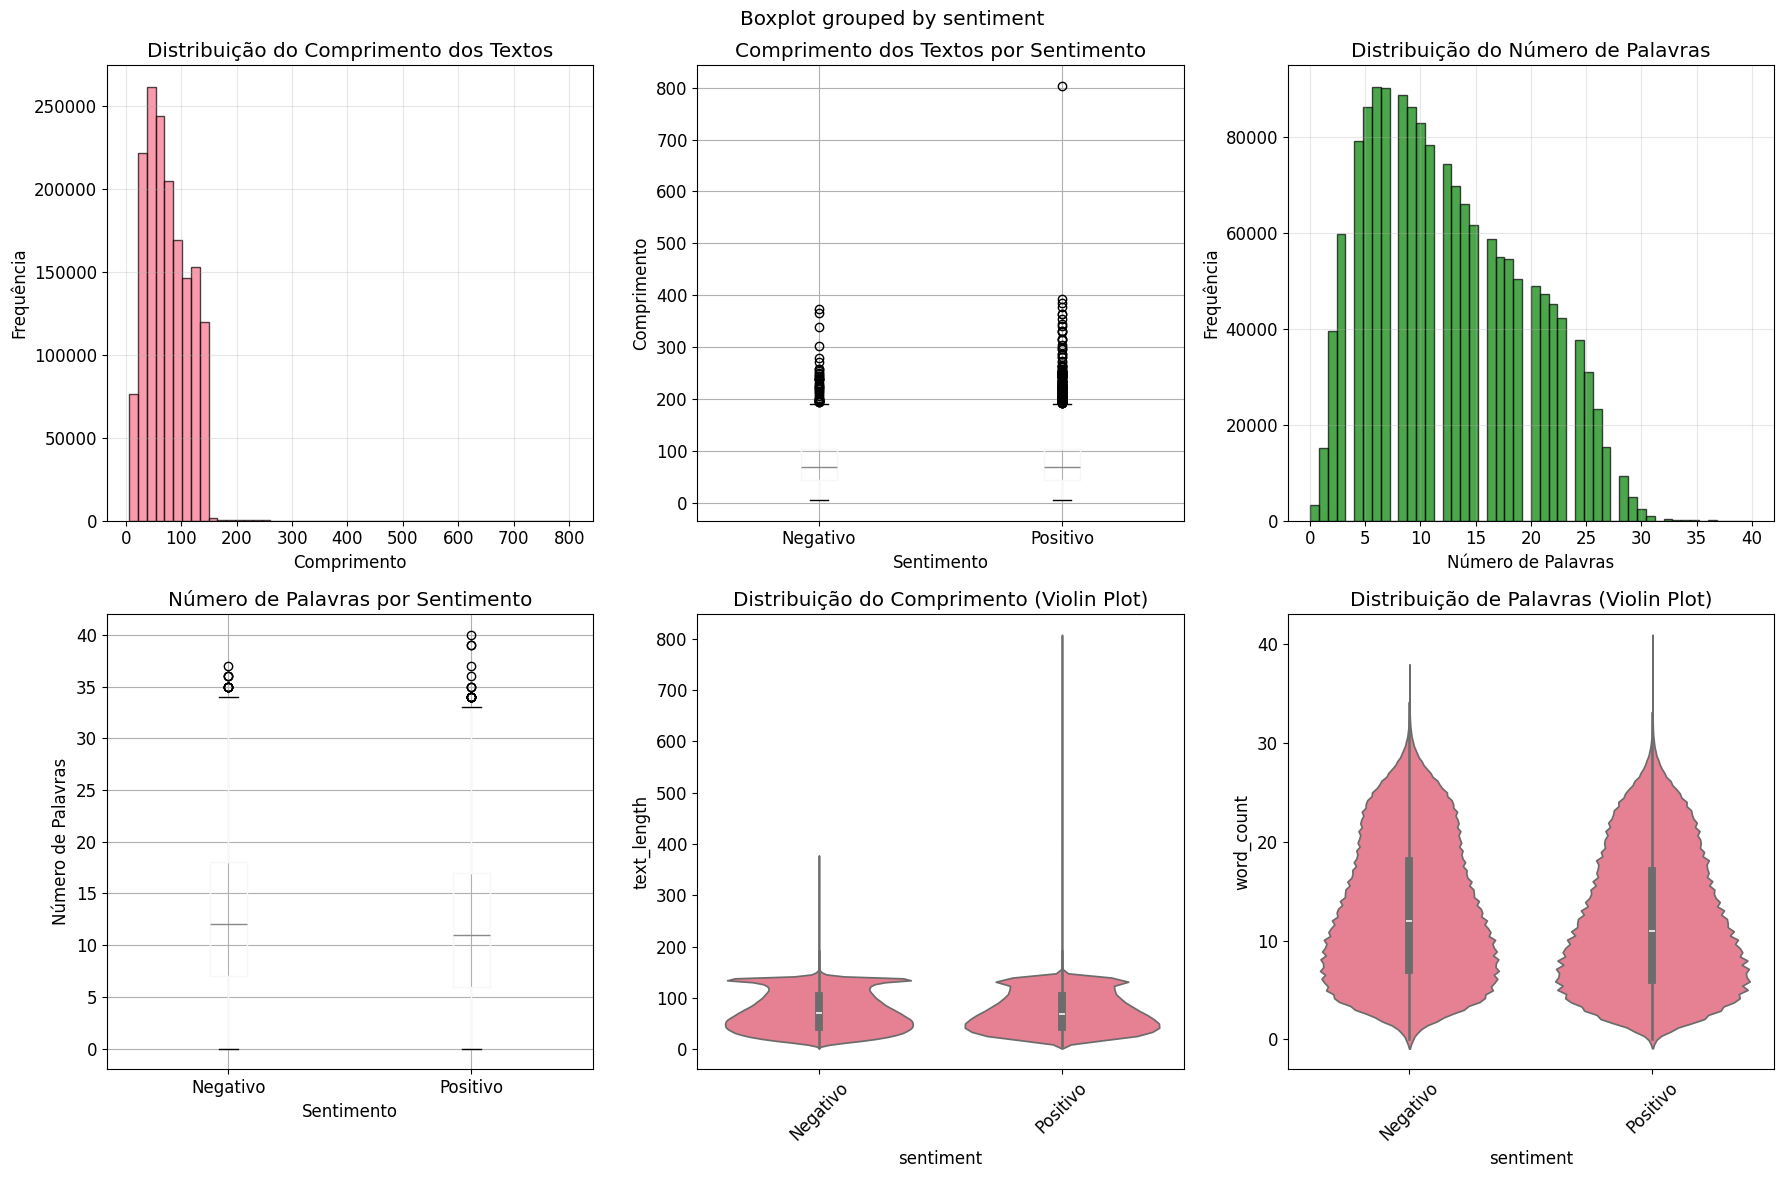

In [11]:
# Estatísticas de texto por sentimento
print("📊 ESTATÍSTICAS DE TEXTO POR SENTIMENTO")
print("=" * 50)

text_stats = df.groupby('sentiment').agg({
    'text_length': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std'],
    'char_count': ['mean', 'median', 'std']
}).round(2)

display(text_stats)

# Visualizações de características de texto
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análise de Características dos Textos', fontsize=16, fontweight='bold')

# Distribuição do comprimento dos textos
df['text_length'].hist(bins=50, ax=axes[0,0], alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribuição do Comprimento dos Textos')
axes[0,0].set_xlabel('Comprimento')
axes[0,0].set_ylabel('Frequência')
axes[0,0].grid(True, alpha=0.3)

# Boxplot de comprimento por sentimento
df.boxplot(column='text_length', by='sentiment', ax=axes[0,1])
axes[0,1].set_title('Comprimento dos Textos por Sentimento')
axes[0,1].set_xlabel('Sentimento')
axes[0,1].set_ylabel('Comprimento')

# Distribuição do número de palavras
df['word_count'].hist(bins=50, ax=axes[0,2], alpha=0.7, edgecolor='black', color='green')
axes[0,2].set_title('Distribuição do Número de Palavras')
axes[0,2].set_xlabel('Número de Palavras')
axes[0,2].set_ylabel('Frequência')
axes[0,2].grid(True, alpha=0.3)

# Boxplot de palavras por sentimento
df.boxplot(column='word_count', by='sentiment', ax=axes[1,0])
axes[1,0].set_title('Número de Palavras por Sentimento')
axes[1,0].set_xlabel('Sentimento')
axes[1,0].set_ylabel('Número de Palavras')

# Violin plot para comprimento
sns.violinplot(data=df, x='sentiment', y='text_length', ax=axes[1,1])
axes[1,1].set_title('Distribuição do Comprimento (Violin Plot)')
axes[1,1].tick_params(axis='x', rotation=45)

# Violin plot para palavras
sns.violinplot(data=df, x='sentiment', y='word_count', ax=axes[1,2])
axes[1,2].set_title('Distribuição de Palavras (Violin Plot)')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Most Frequent Words Analysis

Analisando as palavras mais frequentes no dataset.

ANÁLISE DAS PALAVRAS MAIS FREQUENTES

TOP 20 PALAVRAS MAIS FREQUENTES (GERAL):
 1. good            : 89,403
 2. day             : 82,366
 3. get             : 81,487
 4. like            : 77,749
 5. dont            : 66,929
 6. today           : 64,611
 7. going           : 64,089
 8. love            : 63,467
 9. work            : 62,776
10. cant            : 62,600
11. got             : 60,754
12. time            : 56,105
13. back            : 55,978
14. lol             : 55,188
15. one             : 52,192
16. know            : 51,196
17. really          : 49,550
18. see             : 45,837
19. well            : 44,425
20. still           : 42,803

TOP 20 PALAVRAS MAIS FREQUENTES (GERAL):
 1. good            : 89,403
 2. day             : 82,366
 3. get             : 81,487
 4. like            : 77,749
 5. dont            : 66,929
 6. today           : 64,611
 7. going           : 64,089
 8. love            : 63,467
 9. work            : 62,776
10. cant            : 62,600
11. got  

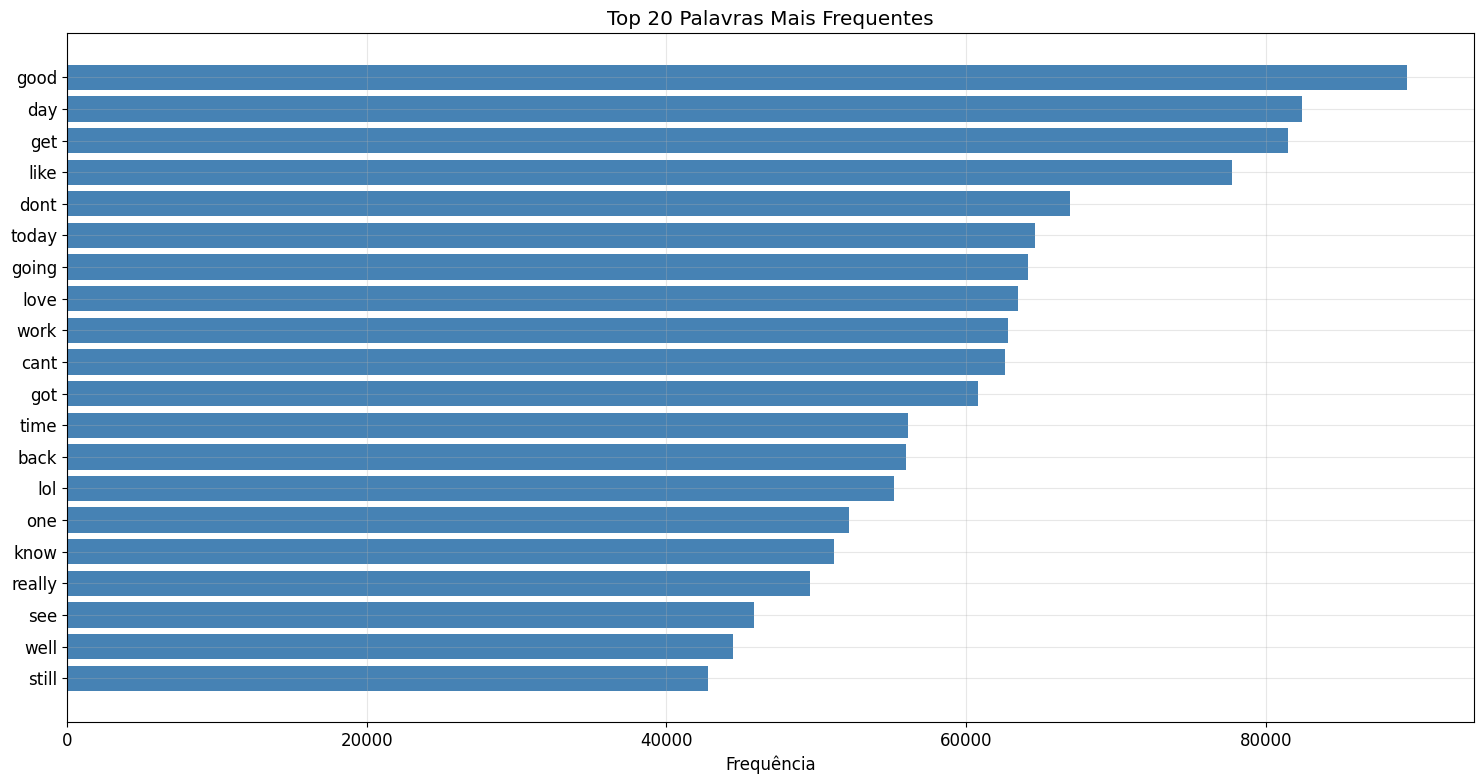

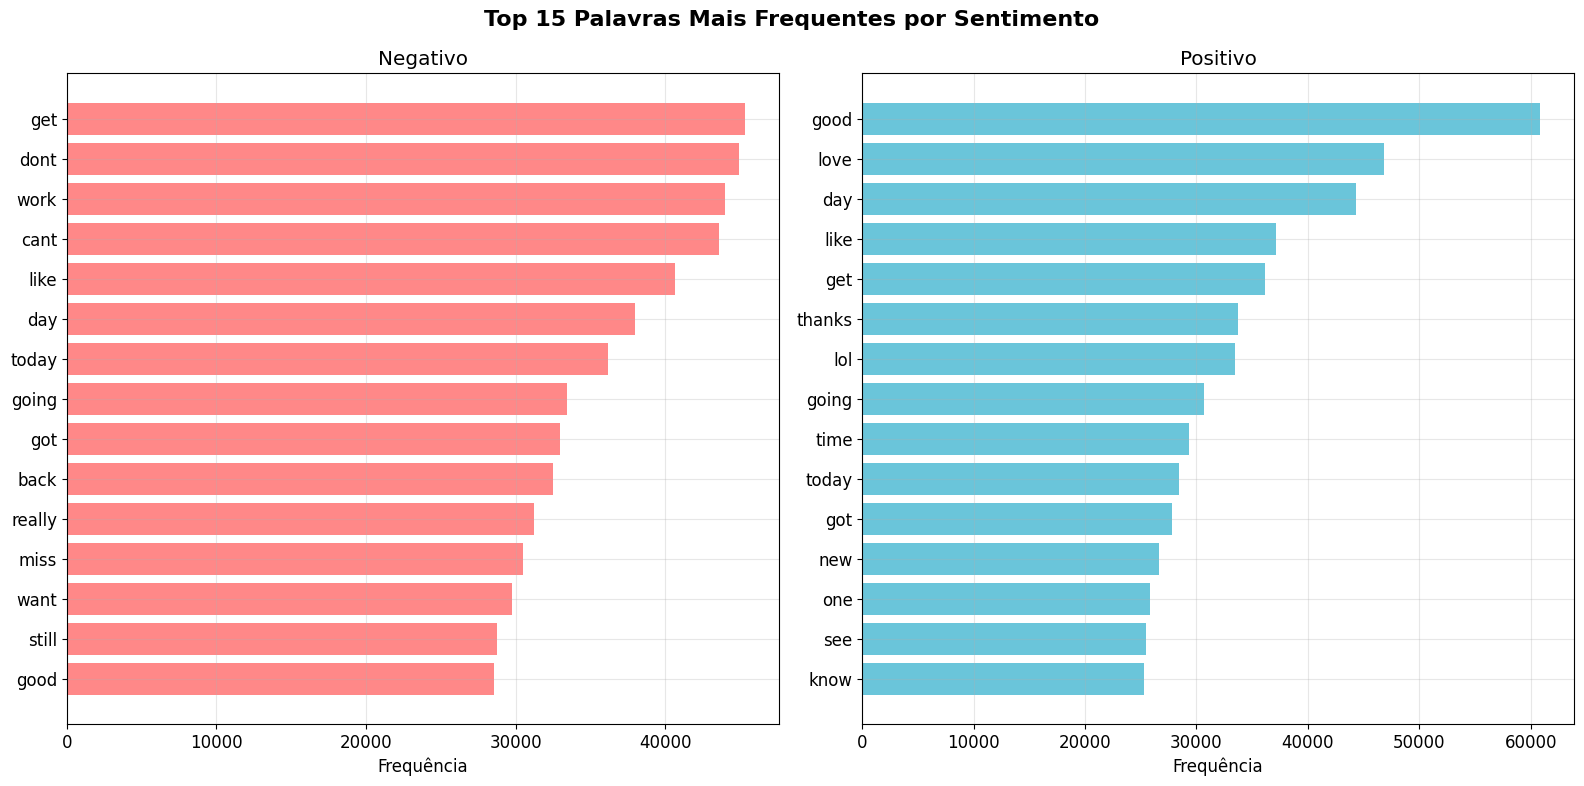

In [12]:
# Análise de palavras mais frequentes
def get_most_frequent_words(text_series, n=20):
    all_words = []
    for text in text_series.dropna():
        words = str(text).split()
        if nltk_available:
            words = [word for word in words if word not in stop_words and len(word) > 2]
        all_words.extend(words)
    
    return Counter(all_words).most_common(n)

print("ANÁLISE DAS PALAVRAS MAIS FREQUENTES")
print("=" * 50)

# Palavras mais frequentes geral
most_frequent_general = get_most_frequent_words(df['text_clean'], 20)
print("\nTOP 20 PALAVRAS MAIS FREQUENTES (GERAL):")
for i, (word, count) in enumerate(most_frequent_general, 1):
    print(f"{i:2d}. {word:15} : {count:,}")

# Criar gráfico das palavras mais frequentes
words_general = [item[0] for item in most_frequent_general]
counts_general = [item[1] for item in most_frequent_general]

plt.figure(figsize=(15, 8))
plt.barh(range(len(words_general)), counts_general, color='steelblue')
plt.yticks(range(len(words_general)), words_general)
plt.xlabel('Frequência')
plt.title('Top 20 Palavras Mais Frequentes')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análise por sentimento - apenas Negativo e Positivo
sentimentos_disponiveis = ['Negativo', 'Positivo']
cores_sentimentos = {'Negativo': '#FF6B6B', 'Positivo': '#45B7D1'}

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Top 15 Palavras Mais Frequentes por Sentimento', fontsize=16, fontweight='bold')

for i, sentimento in enumerate(sentimentos_disponiveis):
    texto_sentimento = df[df['sentiment'] == sentimento]['text_clean']
    most_frequent_sentiment = get_most_frequent_words(texto_sentimento, 15)
    
    words = [item[0] for item in most_frequent_sentiment]
    counts = [item[1] for item in most_frequent_sentiment]
    
    axes[i].barh(range(len(words)), counts, color=cores_sentimentos[sentimento], alpha=0.8)
    axes[i].set_yticks(range(len(words)))
    axes[i].set_yticklabels(words)
    axes[i].set_xlabel('Frequência')
    axes[i].set_title(f'{sentimento}')
    axes[i].invert_yaxis()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Advanced Visualizations

Criando visualizações mais avançadas e interativas.

In [13]:
# Criar uma amostra para visualizações mais rápidas
df_sample = df.sample(n=min(10000, len(df)), random_state=42)

print("VISUALIZAÇÕES AVANÇADAS")
print("=" * 50)
print(f"Usando uma amostra de {len(df_sample):,} registros para visualizações")

# Gráfico de dispersão: comprimento vs número de palavras
fig1 = px.scatter(df_sample, x='word_count', y='text_length', 
                  color='sentiment', size='char_count',
                  title='Relação entre Número de Palavras e Comprimento do Texto',
                  labels={'word_count': 'Número de Palavras', 
                         'text_length': 'Comprimento do Texto'},
                  color_discrete_map={'Negativo': '#FF6B6B', 
                                     'Neutro': '#4ECDC4', 
                                     'Positivo': '#45B7D1'})

fig1.update_layout(height=600)
fig1.show()

# Histograma interativo
fig2 = px.histogram(df_sample, x='word_count', color='sentiment', 
                    title='Distribuição do Número de Palavras por Sentimento',
                    labels={'word_count': 'Número de Palavras'},
                    nbins=50,
                    color_discrete_map={'Negativo': '#FF6B6B', 
                                       'Neutro': '#4ECDC4', 
                                       'Positivo': '#45B7D1'})

fig2.update_layout(height=500)
fig2.show()

# Box plot interativo
fig3 = px.box(df_sample, x='sentiment', y='text_length',
              title='Distribuição do Comprimento dos Textos por Sentimento',
              labels={'text_length': 'Comprimento do Texto', 'sentiment': 'Sentimento'},
              color='sentiment',
              color_discrete_map={'Negativo': '#FF6B6B', 
                                 'Neutro': '#4ECDC4', 
                                 'Positivo': '#45B7D1'})

fig3.update_layout(height=500)
fig3.show()

VISUALIZAÇÕES AVANÇADAS
Usando uma amostra de 10,000 registros para visualizações
